# Apply Baysian Ensemble in vae based anomaly detection
- 1. SMAP dataset
- 2. NAB dataset

In [1]:
%load_ext autoreload
%autoreload 2

### 1. SMAP dataset

In [4]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

test_data = np.load('datasets/SMAP/tmp/P-1_test.npy')
train_data = np.load('datasets/SMAP/tmp/P-1_train.npy')

# readings = raw_data[: , 0]
# readings1 = raw_train_data[: , 0]
# readings = np.concatenate((readings,readings1))
# idx_split = [0, 4000, 5000]
# training = readings[idx_split[2]: ].reshape(-1,1)
# test = readings[idx_split[1]: idx_split[2]].reshape(-1,1)
# valid = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
training = test_data[5000:, 0].reshape(-1, 1)
test = test_data[2000: 5000, 0].reshape(-1, 1)
valid = test_data[: 2000, 0].reshape(-1, 1)
# labels
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)


print(f"raw shape: {test_data.shape} {train_data.shape}")
print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")




/home/new_lab/test/ensemble_bae
raw shape: (8505, 25) (2872, 25)
training shape: (3505, 1)
test shape: (3000, 1)
valid shape: (2000, 1)


In [ ]:
print(test.shape)
df = pd.DataFrame(test, columns=['value'])
df.to_csv('SMAP_P1.csv', index=False)


### 2. NAB dataset

In [32]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

def load_data():
    ambient_temp = pd.read_csv('ambient_temperature_system_failure.csv')
    anomalies_label = ['2013-12-22 20:00:00', '2014-04-13 09:00:00']
    
    anomalies_idx = []
    for label in anomalies_label:
        anomalies_idx.append(ambient_temp[ambient_temp['timestamp'] == label].index[0])

    return ambient_temp['value'].values, anomalies_idx

readings, idx_anomaly = load_data()
print(readings.shape, idx_anomaly)
# split reading into training and test sets
idx_split = [0, 3200, 6400]
training = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
test = readings[idx_split[1]: idx_split[2]].reshape(-1,1)
valid = readings[idx_split[2]: ].reshape(-1,1)

# standardize the dataf
scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

idx_anomaly_test = np.asarray(idx_anomaly) - idx_split[1]

print(f"training set: {training.shape}")
print(f"valid set: {valid.shape}")
print(f"test set: {test.shape}")
print(f"anomalies (in test set): {idx_anomaly_test}")


/home/new_lab/test/ensemble_bae
(7267,) [3721, 6180]
training set: (3200, 1)
valid set: (867, 1)
test set: (3200, 1)
anomalies (in test set): [ 521 2980]


- NY Taxi

In [73]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

data_dir = 'datasets/NAB-known-anomaly/csv-files/nyc_taxi.csv'
def load_data(data_dir):
    raw = pd.read_csv(data_dir)
    anomalies_label = [         
        "2014-11-01 19:00:00",
        "2014-11-27 15:30:00",
        "2014-12-25 15:00:00",  # NOTE: we ignored SOME due to train/valid/test split strategy
        "2015-01-01 01:00:00",
        "2015-01-27 00:00:00"
        ]
    
    anomalies_idx = []
    for label in anomalies_label:
        anomalies_idx.append(raw[raw['timestamp'] == label].index[0])

    return raw['value'].values, anomalies_idx

readings, idx_anomaly = load_data(data_dir)
print(readings.shape, idx_anomaly)
# split reading into training and test sets
idx_split = [0, 4500, 5500, 7500]
training = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
valid = readings[idx_split[1]: idx_split[2]].reshape(-1,1)
test = readings[idx_split[2]: ].reshape(-1,1)

# standardize the data
scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

idx_anomaly_test = np.asarray(idx_anomaly) - idx_split[2]

print(f"training set: {training.shape}")
print(f"valid set: {valid.shape}")
print(f"test set: {test.shape}")
print(f"anomalies (in test set): {idx_anomaly_test}")

/home/new_lab/test/ensemble_bae
(10320,) [5942, 7183, 8526, 8834, 10080]
training set: (4500, 1)
valid set: (1000, 1)
test set: (4820, 1)
anomalies (in test set): [ 442 1683 3026 3334 4580]


- SWAT PIT502

In [2]:
import utils
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt\

test_df = pd.read_csv('datasets/SWaT/SWaT_test_original.csv')
test_np = test_df['PIT502'].to_numpy() # AIT501
test_label = test_df['label'].to_numpy()
anomaly_index = utils.get_anomaly_segment(test_label)
test = test_np[0: 4000].reshape(-1, 1)
training = test_np[4000: 16000].reshape(-1, 1)
valid = test_np[16000: 18000].reshape(-1, 1)


# training = (training - np.mean(training)) / (np.std(training))
# test = (test - np.mean(test)) / np.std(test)
# valid = (valid - np.mean(valid)) / np.std(valid)

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

/home/new_lab/test/ensemble_bae


In [6]:
df = pd.DataFrame(test, columns=['value'])
df.to_csv('SWAT_PIT502.csv', index=False)

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from model import VAEModule, AutoEncoder
from dataloader import VAESegLoader, VAEReconLoader


class Config:
    # model
    seq_len = 10
    in_channel = 1
    win_size = 128
    latent_dim = 10
    hidden_num_units = 64
    sigma = 0.1
    sigma2_offset = 0.01
    hidden_num_units_lstm = 64
    num_layers_lstm = 1
    
    # training
    n_epochs = 10
    lr = 1e-3
    batch_size = 64
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

config = Config()


train_dataset = VAESegLoader(training, config.win_size, "train")
valid_dataset = VAESegLoader(valid, config.win_size, "valid")

train_dataloader =  DataLoader(
    dataset = train_dataset, 
    batch_size = config.batch_size,
    shuffle=True,
    drop_last=True,
)

valid_dataloader =  DataLoader(
    dataset = valid_dataset, 
    batch_size = config.batch_size,
    shuffle=False,
    drop_last=True,
)


- 每次Ensemble都会打乱数据的一种实现方法

In [ ]:
from bae_ensemble import BAE_Ensemble
from model import VAEModule, AutoEncoder
M = 20
members = [AutoEncoder(config) for _ in range(M)]
optimizers = [torch.optim.Adam(model.parameters()) for model in members]

def valid(model, data_loader):
    model.eval()
    total_loss = []
    with torch.no_grad():
        for i, x in enumerate(data_loader):
            x = x.view(config.batch_size, config.in_channel, -1)
            loss = model.fit(x)
            total_loss.append(loss.item())
    return np.average(total_loss)


def train(data_loader, model, config, optimizer):
    model.train()
    for epoch in range(config.n_epochs):
        print(f"-------------- epoch: {epoch} ----------------")
        total_loss = []
        for i, x in enumerate(data_loader):
            x = x.view(config.batch_size, config.in_channel, -1) 
            # print("input: ", x.shape)  
            loss = model.fit(x)
            total_loss.append(loss.item())
            if (i + 1) % 10 == 0:
                print(f"     batch: {i + 1}, batch_loss: {loss.item()}     ")
            model.zero_grad()
            loss.backward()
            optimizer.step()
        train_loss = np.average(total_loss)
        valid_loss = valid(model, valid_dataloader)
        print(f">>>> Epoch: {epoch}, train_loss: {train_loss}, valid_loss: {valid_loss} <<<<")

for m in range(10):
    print(f">>>>>>>>>>>>>>>>>>>> training model {m} <<<<<<<<<<<<<<<<<<<<")
    train(train_dataloader, members[m], config, optimizers[m])


- 每次Ensemble时不打乱数据（结果表明这种方法更稳定）

In [ ]:
from bae_ensemble import BAE_Ensemble
from model import VAEModule, AutoEncoder, MLP
import utils
M = 30
# bvae_ens = BAE_Ensemble(10, VAEModule, config)
np.random.seed(1)
torch.manual_seed(1)
bvae_ens = BAE_Ensemble(M, AutoEncoder, config)
bvae_ens.toDevice(config.device)



def valid(data_loader):
    bvae_ens.eval()
    total_loss = []
    with torch.no_grad():
        for i, x in enumerate(data_loader):
            x = x.view(config.batch_size, config.in_channel, -1)
            x = x.to(config.device)
            loss = bvae_ens.fit(x)
            total_loss.append(loss.item())
    return np.average(total_loss)

def train(data_loader, bvae_ens, config):
   
    for epoch in range(config.n_epochs):
        bvae_ens.train()
        print(f"-------------- epoch: {epoch} ----------------")
        total_loss = []
        for i, x in enumerate(data_loader):
            bvae_ens.zero_optimizers()
            x = x.view(config.batch_size, config.in_channel, -1) # [batch_size, in_channel, win_size]
            x = x.to(config.device)
            # proportion = torch.ones_like(x) * 0.8
            # mask = torch.bernoulli(proportion)
            # x = x * mask
            # print("input: ", x.shape)  
            x.requires_grad = False
            loss = bvae_ens.fit(x)
            total_loss.append(loss.item())
            if (i + 1) % 50 == 0:
                print(f"     batch: {i + 1}, batch_loss: {loss.item()}     ")
            
            loss.backward()
            bvae_ens.step_optimizers()
        train_loss = np.average(total_loss)
        valid_loss = valid(valid_dataloader)
        print(f">>>> Epoch: {epoch}, train_loss: {train_loss}, valid_loss: {valid_loss} <<<<")


# train(train_dataloader, bvae_ens, config)
# bvae_ens.set_optimizers_lr(1e-5)
# bvae_ens.tunning_var()
# print("******************* tunning variance *******************")
# train(train_dataloader, bvae_ens, config)

config.n_epochs = 5
print(config.device)
train(train_dataloader, bvae_ens, config)

print("******************* tunning variance *******************")
config.n_epochs = 10
# bvae_ens.set_punishment(mean_residual)
bvae_ens.set_loss_type("rnll")
bvae_ens.tunning_var(1e-3)
train(train_dataloader, bvae_ens, config)

# config.n_epochs = 10
# bvae_ens.tunning_var(1e-4)
# train(train_dataloader, bvae_ens, config)
######### homo ##############
# log_var_approx = torch.nn.Parameter(torch.ones(1) * np.log(2)) # homo
# optim = torch.optim.SGD([{'params': log_var_approx}], 1e-4)



cuda
-------------- epoch: 0 ----------------
     batch: 50, batch_loss: 238.92190551757812     
     batch: 100, batch_loss: 237.61549377441406     
     batch: 150, batch_loss: 237.81948852539062     
>>>> Epoch: 0, train_loss: 250.8273070464263, valid_loss: 239.22066471494477 <<<<
-------------- epoch: 1 ----------------
     batch: 50, batch_loss: 237.83840942382812     
     batch: 100, batch_loss: 237.77256774902344     
     batch: 150, batch_loss: 238.15853881835938     
>>>> Epoch: 1, train_loss: 237.82969442831504, valid_loss: 239.21049604744746 <<<<
-------------- epoch: 2 ----------------
     batch: 50, batch_loss: 238.13800048828125     
     batch: 100, batch_loss: 237.76638793945312     
     batch: 150, batch_loss: 237.9246063232422     
>>>> Epoch: 2, train_loss: 237.81710361790013, valid_loss: 239.21617442163927 <<<<
-------------- epoch: 3 ----------------
     batch: 50, batch_loss: 237.6400146484375     
     batch: 100, batch_loss: 237.84329223632812     
     b

In [ ]:
# 分开训练
bvae_ens.tunning_var()
logvar_net = MLP(config.win_size).to(config.device)
logvar_net_optim = torch.optim.Adam(logvar_net.parameters(), lr=1e-3)
config.n_epochs = 15
config.batch_size = 32
print("******************* tunning variance *******************")

def ens_valid(data_loader, bvae_ens, var_net):
    bvae_ens.eval()
    var_net.eval()
    total_loss = []
    with torch.no_grad():
        for i, x in enumerate(data_loader):
            x = x.view(config.batch_size, config.in_channel, -1) # (batch_size, in_channel, win_size)
            x = x.to(config.device)
            x_pred = bvae_ens.predict_mean(x)
            logvar = logvar_net(x)
            var = logvar + 1e-2
            residual = (x - x_pred)**2
            regularizer = torch.exp(-residual).to(config.device)
            mse =  torch.sum((regularizer *  residual / var  + (1 - regularizer) * var + np.log(2*np.pi)), dim=(1, 2)).to(config.device)
            loss = torch.mean(mse)
            # print(loss)
            # print(0.4 * mse.mean(), 0.6 * regularizer.mean())
            total_loss.append(loss.item())
    return np.average(total_loss)

def tunning(data_loader, bvae_ensemble, logvar_net_optim, logvar_net):
    bvae_ensemble.eval()
    logvar_net.train()

    for epoch in range(config.n_epochs):
        print(f"--------------tunning epoch: {epoch} ----------------")
        total_loss = []
        for i, x in enumerate(data_loader):
            logvar_net_optim.zero_grad()

            x = x.view(config.batch_size, config.in_channel, -1) # (batch_size, in_channel, win_size)
            x = x.to(config.device)
            x_pred = bvae_ensemble.predict_mean(x)
            logvar = logvar_net(x)
            residual = (x - x_pred)**2
            var = logvar + 1e-2
            regularizer = torch.exp(-residual).to(config.device)
            mse =  torch.sum((regularizer *  residual / var  + (1 - regularizer) * var + np.log(2*np.pi)), dim=(1, 2)).to(config.device)
            loss = torch.mean(mse)
            # print(regularizer.mean(), (torch.exp(-logvar) * residual).mean(), logvar.mean())
            total_loss.append(loss.item())
            if (i + 1) % 20 == 0:
                print(f"     batch: {i + 1}, batch_loss: {loss.item()}     ")
            loss.backward()
            logvar_net_optim.step()
        train_loss = np.average(total_loss)
        valid_loss = ens_valid(valid_dataloader, bvae_ensemble, logvar_net)
        print(f">>>> Epoch: {epoch}, train_loss: {train_loss}, valid_loss: {valid_loss} <<<<")
tunning(train_dataloader, bvae_ens,  logvar_net_optim, logvar_net)


In [ ]:
# lstm拟合+mlp分别训练
from model import LSTMModule, MLP

def ens_valid(data_loader, bvae_ens, var_net):
    bvae_ens.eval()
    var_net.eval()
    total_loss = []
    with torch.no_grad():
        for i, x in enumerate(data_loader):
            x = x.view(-1, config.in_channel, tunning_win) # (batch_size, in_channel, win_size)
            x_pred = bvae_ens.predict_mean(x)
            noise_std = log_var_net(x)
            eps = torch.randn_like(x)
            noise = eps * noise_std
            loss = torch.sum(( (x - x_pred - noise)**2 / (noise_std**2 + 1e-3) +  torch.log(2 * np.pi * (noise_std**2))), dim=(1,2)).mean()
            total_loss.append(loss.item())
    return np.average(total_loss)


def tunning(data_loader, trained_module, config, optim, log_var_net, tunning_win = 32):
    trained_module.eval()
    log_var_net.train()
    num = 0
    for epoch in range(config.n_epochs):
        print(f"--------------tunning epoch: {epoch} ----------------")
        total_loss = []
        for i, x in enumerate(data_loader):
            optim.zero_grad()

            x = x.view(config.batch_size, config.in_channel, -1) # (batch_size, in_channel, win_size)
            x_pred = trained_module.predict_mean(x)
            noise_std = log_var_net(x)
            eps = torch.randn_like(x)
            noise = eps * noise_std
            loss = torch.sum(( (x - x_pred - noise)**2 / (noise_std**2 + 1e-3) +  torch.log(2 * np.pi * (noise_std**2))), dim=(1,2)).mean()
            # x_pred = lstm_module.predict(x.view(-1, tunning_win, config.in_channel)) lstm
            # x_pred = x_pred.view(-1, config.in_channel, tunning_win)
            # for k in range(config.win_size // tunning_win):
            #     x_win = x[:, :, k*tunning_win: (k+1)*tunning_win]
            #     x_pred_win = x_pred[:, :, k*tunning_win: (k+1)*tunning_win]
            #     noise_std = log_var_net(x_win)
            #     eps = torch.randn_like(x_win)
            #     noise = eps * noise_std
            #     loss += torch.sum(( (x_win - x_pred_win - noise)**2 / (noise_std**2 + 1e-3) +  torch.log(2 * np.pi * (noise_std**2))), dim=(1,2)).mean()
                
            # x_pred = trained_module.predict_mean(x)
            # noise_std = log_var_net(x)
            # eps = torch.randn_like(x)
            # noise = eps * noise_std
            # loss = torch.sum(( (x - x_pred - noise)**2 / (noise_std**2 + 1e-3) +  torch.log(2 * np.pi * (noise_std**2))), dim=(1,2)).mean()
            print(noise**2)
            total_loss.append(loss.item())
            if (i + 1) % 10 == 0:
                print(f"     batch: {i + 1}, batch_loss: {loss.item()}     ")

            loss.backward()
            optim.step()
        train_loss = np.average(total_loss)
        valid_loss = ens_valid(valid_dataloader, trained_module, log_var_net)
        print(f">>>> Epoch: {epoch}, train_loss: {train_loss}, valid_loss: {valid_loss} <<<<")


def regression_valid(data_loader, lstm_module, config, seq_len):
    lstm_module.eval()
    total_loss = []
    with torch.no_grad():
        for i, x in enumerate(data_loader):
            x = x.view(-1, seq_len, config.in_channel)
            loss = lstm_module.fit(x)
            total_loss.append(loss.item())
    return np.average(total_loss)


def regression_train(data_loader, lstm_module, config, optim, seq_len = 32):
    
    for epoch in range(config.n_epochs):
        print(f"--------------regression epoch: {epoch} ----------------")
        lstm_module.train()
        total_loss = []
        for i, x in enumerate(data_loader):
            optim.zero_grad()
            x = x.view(config.batch_size, seq_len, config.in_channel) # (batch_size, in_channel, win_size)

            loss = lstm_module.fit(x)
            
            total_loss.append(loss.item())
            if (i + 1) % 10 == 0:
                print(f"     batch: {i + 1}, batch_loss: {loss.item()}     ")
            loss.backward()
            optim.step()
        train_loss = np.average(total_loss)
        valid_loss = regression_valid(valid_dataloader, lstm_module, config, seq_len)
        print(f">>>> Epoch: {epoch}, train_loss: {train_loss}, valid_loss: {valid_loss} <<<<")
        
            
######### heter ############
tunning_win = 128
log_var_net = MLP(input_dim=tunning_win, output_dim=tunning_win) # heter
# lstm_module = LSTMModule(config)
# optim_lstm_net = torch.optim.Adam([{'params': lstm_module.parameters()}], 1e-3, weight_decay=1)
optim_log_var_net = torch.optim.Adam([{'params': log_var_net.parameters()}], 1e-3)
# config.n_epochs = 10
tunning(train_dataloader, bvae_ens, config, optim_log_var_net, log_var_net, tunning_win)

#>>>>>>>>>>>>> lstm + mlp <<<<<<<<<<<<<<<<
# train_tunning_dataset = VAESegLoader(training, tunning_win, "train")

# train_tunning_dataloader =  DataLoader(
#     dataset = train_tunning_dataset, 
#     batch_size = config.batch_size,
#     shuffle=True,
#     drop_last=True,
# )
# regression_train(train_tunning_dataloader, lstm_module, config, optim_lstm_net, tunning_win)
# config.n_epochs = 20
# tunning(train_tunning_dataloader, lstm_module, config, optim_log_var_net, log_var_net, tunning_win)



- 在合成数据上评估aleatoric是否获取准确

In [ ]:
import utils
import torch
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from torch.utils.data import Dataset, DataLoader
from dataloader import VAESegLoader
import matplotlib.pyplot as plt
from model import MLP
from bae_ensemble import BAE_Ensemble
M =20
config.n_epochs = 10 # 70
config.win_size = 32
config.latent_dim = 10
config.batch_size = 8
config.hidden_num_units = 128
bvae_ens = BAE_Ensemble(M, AutoEncoder, config)
bvae_ens.toDevice(config.device)
generator = utils.Synthetic_heteroscedasticData_generator(1, 2, 5, 30)
data = generator.get_data(1000)


def valid(data_loader):
    bvae_ens.eval()
    total_loss = []
    with torch.no_grad():
        for i, x in enumerate(data_loader):
            x = x.view(config.batch_size, config.in_channel, -1)
            x = x.to(config.device)
            loss = bvae_ens.fit(x)
            total_loss.append(loss.item())
    return np.average(total_loss)


def train(data_loader, bvae_ens, config):
    bvae_ens.train()
    for epoch in range(config.n_epochs):
        print(f"-------------- epoch: {epoch} ----------------")
        total_loss = []
        for i, x in enumerate(data_loader):
            bvae_ens.zero_optimizers()
            x = x.view(config.batch_size, config.in_channel, -1) 
            x = x.to(config.device)
            x.requires_grad = False
            loss = bvae_ens.fit(x)
            total_loss.append(loss.item())
            if (i + 1) % 20 == 0:
                print(f"     batch: {i + 1}, batch_loss: {loss.item()}     ")
            loss.backward()
            bvae_ens.step_optimizers()
        train_loss = np.average(total_loss)
        valid_loss = valid(test_syn_dataloader)
        print(f">>>> Epoch: {epoch}, train_loss: {train_loss}, valid_loss: {valid_loss} <<<<")

# def tunning(data_loader, bvae_ens, config, optim):
#     bvae_ens.train()
#     for epoch in range(config.n_epochs):
#         print(f"-------------- epoch: {epoch} ----------------")
#         total_loss = []
#         for i, x in enumerate(data_loader):
#             optim.zero_grad()
#             x = x.view(config.batch_size, config.in_channel, -1) 
#             x.requires_grad = False
#             x_pred = bvae_ens.predict_mean(x)
            
#             # log_var_approx = log_var_net(x.unsqueeze(-1)).squeeze(-1)

#             log_var_approx = log_var_net(x)
#             # log_var_approx = log_var_approx.view(config.batch_size, config.in_channel, -1)
#             loss = torch.sum((torch.exp(-log_var_approx) * (x - x_pred)**2 + log_var_approx + np.log(2*np.pi)), dim=(1,2)).mean()
#             total_loss.append(loss.item())
#             if (i + 1) % 10 == 0:
#                 print(f"     batch: {i + 1}, batch_loss: {loss.item()}     ")
#             loss.backward()
#             optim.step()
#         train_loss = np.average(total_loss)
#         print(f">>>> Epoch: {epoch}, train_loss: {train_loss} <<<<")
    

y_tildes = data['y_tilde'].clone().detach()
y_tildes_test = data['y_disturb_tilde'].clone().detach()

scaler = StandardScaler()
scaler.fit(y_tildes)
y_tildes = scaler.transform(y_tildes)
y_tildes_test = scaler.transform(y_tildes_test)
ys = data['y'].clone().detach()

print(y_tildes.shape)

train_syn_dataset = VAESegLoader(y_tildes, config.win_size, "train")
train_syn_dataloader =  DataLoader(
    dataset = train_syn_dataset, 
    batch_size = config.batch_size,
    shuffle=True,
    drop_last=True,
)

test_syn_dataset = VAESegLoader(y_tildes_test, config.win_size, "train")
test_syn_dataloader =  DataLoader(
    dataset = test_syn_dataset, 
    batch_size = config.batch_size,
    shuffle=True,
    drop_last=True,
)
test = y_tildes_test
training = y_tildes
# heter 
config.n_epochs = 5
train(train_syn_dataloader, bvae_ens, config)
bvae_ens.set_loss_type('rnll')
config.n_epochs = 10
train(train_syn_dataloader, bvae_ens, config)
# # log_var_approx = torch.nn.Parameter(torch.ones(1) * np.log(2)) # homo
# # optim = torch.optim.SGD([{'params': log_var_approx}], 1e-4)
# log_var_net = MLP() # heter
# optim = torch.optim.Adam([{'params': log_var_net.parameters()}], 1e-3)
# config.n_epochs = 10
# tunning(train_syn_dataloader, bvae_ens, config, optim)

In [ ]:
# plotting aleatoric for paper

y_std = generator.get_y_std(data['y_disturb']).numpy()
print(y_tildes_test.shape,y_std.shape)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.figure(figsize=(10, 6))

ax.plot(data['y_disturb_tilde'].numpy(), alpha=0.9, color='steelblue')
# upper_bound = data['y_disturb'].numpy() + 2 * y_std
# lower_bound = data['y_disturb'].numpy() - 2 * y_std

# ax.fill_between(np.arange(y_tildes_test.shape[0]), upper_bound.flatten(), lower_bound.flatten(), color='steelblue', alpha=0.2, label='uncertainty')
ax.plot(data['y_disturb'].numpy(), color=(117/255, 189/255, 66/255), alpha=1, lw=2)
# ax[2].fill_between(np.arange(len(y_tildes_test)), upper_bound, lower_bound, color='blue', alpha=0.1, label='uncertainty')
# plt.xlabel('Time')#, fontsize=8, labelpad=1)
# # plt.xticks(fontsize=7)
# plt.ylabel('Value')#, fontsize=8, labelpad=1)
# plt.yticks(fontsize=7)
# plt.fill_between((180, 310), -3,3, color='red', alpha=0.2, label='anomaly')



ax.set_xticks([])  # 去掉 x 轴刻度
ax.set_yticks([])  # 去掉 y 轴刻度

ax.spines['top'].set_visible(False)     # 去掉上边框
ax.spines['right'].set_visible(False)   # 去掉右边框
ax.spines['bottom'].set_visible(False)  # 去掉下边框
ax.spines['left'].set_visible(False)    # 去掉左边框
# plt.savefig('example2.png', dpi=300)
plt.tight_layout()
plt.show()



In [ ]:
# plotting prior distribution for paper
from scipy.stats import norm
x = np.linspace(-1, 1, 100)
y = norm.pdf(x, 0, 1 / 4)
plt.figure(figsize=(4, 3))
plt.plot(x, y,  color='gray')
# plt.xlabel('Time', fontsize=8, labelpad=1)
plt.xticks(fontsize=7)
# plt.ylabel('Value', fontsize=8, labelpad=1)
plt.yticks(fontsize=7)
# plt.fill_between((180, 310), -3,0.5, color='red', alpha=0.2, label='anomaly')
plt.savefig('weight_prior.png')
plt.show()



- 挑选了测试集中的部分用例用来可视化重建效果(可以不运行)

In [ ]:
import utils
# anomaly detection only vae on test
test_dataset = VAESegLoader(test, config.win_size, "test")

test_dataloader =  DataLoader(
    dataset = test_dataset, 
    batch_size = config.batch_size,
    shuffle=False,
    drop_last=True,
)

recons_error = []
# for visualization
recstructed_signal = np.zeros((10, config.in_channel, config.win_size))
original_signal = np.zeros((10, config.in_channel, config.win_size))
upper_bound = np.zeros((10, config.in_channel, config.win_size))
lower_bound = np.zeros((10, config.in_channel, config.win_size))
signal_idx = np.zeros(10)

bvae_ens.eval()
for i, x in enumerate(test_dataloader):
    x = x.view(config.batch_size, config.in_channel, -1)
    predictions = bvae_ens.predict(x) # (10, batch_size, in_channel, win_size)

    if i + 1 < 10:
        recstructed_signal[i] = np.mean(predictions[:, 0], axis=0)
        recstructed_signal[i+1] = np.mean(predictions[:, -1], axis=0)
        original_signal[i] = x[0].detach().numpy()
        original_signal[i+1] = x[-1].detach().numpy()
        upper_bound[i] = np.mean(predictions[:, 0], axis=0) + 2 * np.std(predictions[:, 0], axis=0)
        upper_bound[i+1] = np.mean(predictions[:, -1], axis=0) + 2 * np.std(predictions[:, -1], axis=0)
        lower_bound[i] = np.mean(predictions[:, 0], axis=0) - 2 * np.std(predictions[:, 0], axis=0)
        lower_bound[i+1] = np.mean(predictions[:, -1], axis=0) - 2 * np.std(predictions[:, -1], axis=0)
        signal_idx[i] = i * config.batch_size
        signal_idx[i+1] = (i+1) * config.batch_size - config.win_size
    predictions = np.mean(predictions, axis=0)
    error = torch.mean((x - predictions)**2, dim=(1,2)).detach().numpy()
    recons_error.append(error)
recons_error = np.array(recons_error).flatten()
prefix = np.ones(config.win_size - 1) * recons_error[0]
recons_error = np.concatenate((prefix, recons_error))

# plot the reconstruction error
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
ax[0].plot(test.flatten(), label='original signal')
ax[0].legend()
ax[1].plot(recons_error, label='reconstruction error')
ax[1].legend()
plt.show()
    
# plot
# utils.plot_reconstructed_confidence_signal(upper_bound, lower_bound, original_signal, config.in_channel)
# print(signal_idx)


In [ ]:
# lstm拟合+mlp微调aleatoric获取测试集合训练
tunning_win = 64
log_var_net = MLP(input_dim=tunning_win, output_dim=tunning_win) # heter
lstm_module = LSTMModule(config)
optim_lstm_net = torch.optim.Adam([{'params': lstm_module.parameters()}], 1e-4)
optim_log_var_net = torch.optim.Adam([{'params': log_var_net.parameters()}], 1e-4)
config.n_epochs = 5


test_tunning_dataset = VAESegLoader(test, tunning_win, "test")

test_tunning_dataloader =  DataLoader(
    dataset = test_tunning_dataset, 
    batch_size = config.batch_size,
    shuffle=True,
    drop_last=True,
)
regression_train(test_tunning_dataloader, lstm_module, config, optim_lstm_net, tunning_win)
config.n_epochs = 15
tunning(test_tunning_dataloader, lstm_module, config, optim_log_var_net, log_var_net, tunning_win)

In [13]:
import utils
from dataloader import VAEReconLoader
# anomaly detection only vae on test


# test_recons_dataset = VAEReconLoader(y_tildes_test, config.win_size, "test")
# test_recons_dataset = VAEReconLoader(training, config.win_size, "train")
test_recons_dataset = VAEReconLoader(test, config.win_size, "test")

batch_size = 1
test_recons_dataloader =  DataLoader(
    dataset = test_recons_dataset, 
    batch_size = batch_size,
    shuffle=False,
    drop_last=True,
)

# for visualization
recstructed_signal = []
approx_var_heter = []
regression_error = []
bvae_ens.eval()
# log_var_net.eval()
# lstm_module.eval()
for i, x in enumerate(test_recons_dataloader):
    x = x.view(batch_size, config.in_channel, -1)
    # prediction = bvae_ens.predict_mean(x) # (10, batch_size, in_channel, win_size)
    x = x.to(config.device)
    prediction, logvar = bvae_ens.predict_mean_logvar(x)
    # logvar = logvar_net(x)
    # var = torch.exp(logvar)
    var = logvar


    recstructed_signal.extend(prediction.detach().cpu().numpy().flatten())
    approx_var_heter.extend(var.detach().cpu().numpy().flatten())
    # for k in range(config.win_size // tunning_win):
    #     x_win = x[:, :, k*tunning_win: (k+1)*tunning_win]
    #     log_var_approx = log_var_net(x_win)
    #     regression = lstm_module.predict(x_win.view(-1, tunning_win, config.in_channel))
    #     regression = regression.view(x_win.shape)
    #     regression_error.extend(((x_win-regression)**2).detach().numpy().flatten())
    #     approx_var_heter.extend(torch.exp(log_var_approx).detach().numpy().flatten())
recstructed_signal = np.array(recstructed_signal)
approx_var_heter = np.array(approx_var_heter)
regression_error = np.array(regression_error)


In [ ]:
# epistemic uncertianty for paper
import utils
from dataloader import VAEReconLoader
# anomaly detection only vae on test


# test_recons_dataset = VAEReconLoader(y_tildes_test, config.win_size, "test")
# test_recons_dataset = VAEReconLoader(training, config.win_size, "train")
test_recons_dataset = VAEReconLoader(test, config.win_size, "test")

batch_size = 1
test_recons_dataloader =  DataLoader(
    dataset = test_recons_dataset, 
    batch_size = batch_size,
    shuffle=False,
    drop_last=True,
)

# for visualization
recstructed_signals = [ [] for _ in range(M)]

bvae_ens.eval()
# log_var_net.eval()
# lstm_module.eval()
for i, x in enumerate(test_recons_dataloader):
    x = x.view(batch_size, config.in_channel, -1)
    # prediction = bvae_ens.predict_mean(x) # (10, batch_size, in_channel, win_size)
    x = x.to(config.device)
    prediction = bvae_ens.predict_stack_values(x)
    for m in range(M):
        recstructed_signals[m].extend(prediction[m].detach().cpu().numpy().flatten())
recstructed_signals = np.array(recstructed_signals)
print(recstructed_signals.shape)


recstructed_signals_std = np.std(recstructed_signals, axis=0)
recstructed_signals_mean = np.mean(recstructed_signals, axis=0)
upper_bound = recstructed_signals_mean + 2 * recstructed_signals_std
lower_bound = recstructed_signals_mean - 2 * recstructed_signals_std
upper_bound = np.convolve(upper_bound, np.ones(10)/10, mode='same')
lower_bound = np.convolve(lower_bound, np.ones(10)/10, mode='same')

recstructed_signals_any = np.convolve(recstructed_signals[0, ], np.ones(20)/20, mode='same')
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(hspace = .3, wspace=.01)

ax.fill_between(np.arange(len(recstructed_signals_mean)), upper_bound, lower_bound, color=(238/255, 130/255, 47/255), alpha=0.3, label='uncertainty')
ax.plot(test.flatten(), label='True Signal', color='steelblue', alpha=0.7)
# ax.plot(recstructed_signals_mean, color=(117/255, 189/255, 66/255), alpha=1, lw=2 , )

ax.set_xticks([])  # 去掉 x 轴刻度
ax.set_yticks([])  # 去掉 y 轴刻度

ax.spines['top'].set_visible(False)     # 去掉上边框
ax.spines['right'].set_visible(False)   # 去掉右边框
ax.spines['bottom'].set_visible(False)  # 去掉下边框
ax.spines['left'].set_visible(False)    # 去掉左边框
# plt.savefig('epistemic_example.png', dpi=300)f
plt.tight_layout()
plt.show()



In [14]:
import utils
from dataloader import VAEReconLoader
# anomaly detection only vae on test


# test_recons_dataset = VAEReconLoader(y_tildes_test, config.win_size, "test")
# test_recons_dataset = VAEReconLoader(training, config.win_size, "train")
test_recons_dataset = VAEReconLoader(test, config.win_size, "test")

batch_size = 1
test_recons_dataloader =  DataLoader(
    dataset = test_recons_dataset, 
    batch_size = batch_size,
    shuffle=False,
    drop_last=True,
)

# for visualization
recstructed_signals = [ [] for _ in range(M) ]
bvae_ens.eval()
# log_var_net.eval()
# lstm_module.eval()
for i, x in enumerate(test_recons_dataloader):
    x = x.view(batch_size, config.in_channel, -1)
    # prediction = bvae_ens.predict_mean(x) # (10, batch_size, in_channel, win_size)
    x = x.to(config.device)
    prediction = bvae_ens.predict_stack_values(x)
    # logvar = logvar_net(x)
    for m in range(M):
        recstructed_signals[m].extend(prediction[m].detach().cpu().numpy().flatten())
recstructed_signals = np.array(recstructed_signals)
recs_mean = np.mean(recstructed_signals, axis=0)
recs_std = np.std(recstructed_signals, axis=0)
recs_upper_bound = recs_mean + 2 * recs_std
recs_lower_bound = recs_mean - 2 * recs_std
recs_upper_bound = np.convolve(recs_upper_bound, np.ones(10)/10, mode='same')
recs_lower_bound = np.convolve(recs_lower_bound, np.ones(10)/10, mode='same')
# 去掉高于均值 + 3倍标准差的值

print(recstructed_signals.shape, recs_mean.shape)

(30, 3968) (3968,)


(3968,) (3968,) (0,)


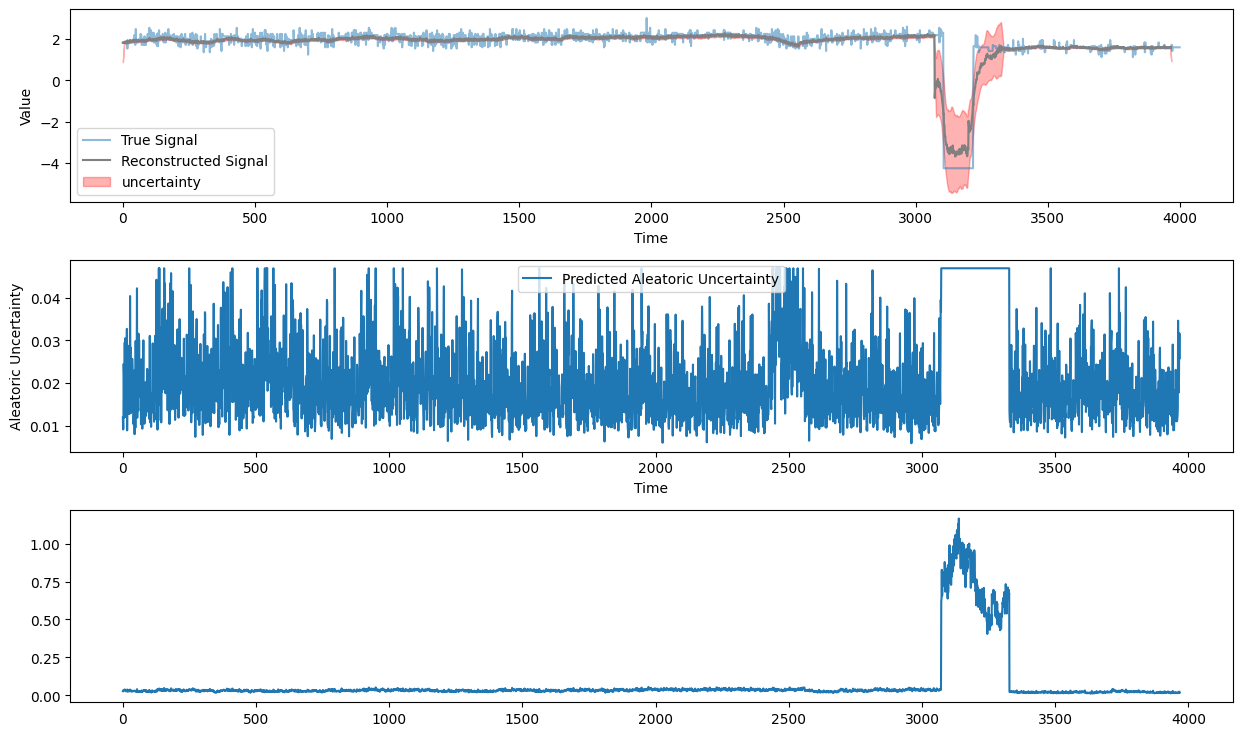

In [15]:
print(recstructed_signal.shape, approx_var_heter.shape, regression_error.shape)
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 9))
fig.subplots_adjust(hspace = .3, wspace=.01)
axs[0].plot(test.flatten(), label='True Signal', alpha=0.5)
# ys = scaler.transform(data['y'].clone().detach())
# axs[0].plot(ys , label='clean signal')

axs[0].plot(recstructed_signal, color='gray', label='Reconstructed Signal', alpha=1)
axs[0].fill_between(np.arange(len(recs_lower_bound)), recs_upper_bound, recs_lower_bound, color='red', alpha=0.3, label='uncertainty')
axs[0].legend()
# axs[0].grid()
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Value")
###################### HOMO ###########################
# homo_var = np.ones_like(y_tildes.squeeze(-1)) * np.exp(log_var_approx.detach().numpy())
# true_var = np.ones_like(y_tildes.squeeze(-1)) * (generator.get_y_std()**2)
########################################################

# approx_var_heter_smoot = utils.smooth(approx_var_heter, filter_win=5)
# approx_var_heter = np.convolve(approx_var_heter, np.ones(20)/20, mode='same')
approx_var_heter1 = utils.remove_outliers_iqr(approx_var_heter, factor=2)
# alea_smoot = gaussian_filter1d(approx_var_heter1, sigma=5)
axs[1].plot(approx_var_heter1, label='Predicted Aleatoric Uncertainty')
# axs[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
# axs[1].grid()

# true_var_heter = ((generator.get_y_std(data['y_disturb']) / scaler.scale_)**2).detach().numpy().flatten()
# axs[1].plot(true_var_heter, label='True Aleatoric Uncertainty')

axs[1].legend()
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Aleatoric Uncertainty")
# axs[1].set_ylim(0, 0.4)
# plt.savefig("toy_example_10.png", dpi=300)

recons_error = ((test.flatten()[:len(recstructed_signal)] - recstructed_signal.flatten())**2)
filter_win = 10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
recons_error_smoot = np.convolve(recons_error, np.ones(filter_win)/filter_win, mode='same')

axs[2].plot(recs_std, label='recons error')
# axs[2].set_ylim(0, 0.2)
plt.show() 

### Anomaly score uncertainty(epistemic, aleatoric) propagate （开始传播到异常分数）
- Get epistemic, aleatoric based law of total variance
- First of all, convert nll(anomaly score, reconstruction error) to a distribution

- 每次ensemble都进行打乱数据

In [ ]:
# anomaly detection only vae on test
test_dataset = VAESegLoader(test, config.win_size, "test")

test_dataloader =  DataLoader(
    dataset = test_dataset, 
    batch_size = config.batch_size,
    shuffle=False,
    drop_last=True,
)

# for visualization
data_len = len(test_dataloader) * config.batch_size
prefix_len = config.win_size - 1
error = np.zeros((data_len, M))
upper_bound = np.zeros(prefix_len + data_len)  
lower_bound = np.zeros(prefix_len + data_len)


for m in range(M):
    members[m].eval()

for i, x in enumerate(test_dataloader):
    x = x.view(config.batch_size, config.in_channel, -1)
    for m in range(M):
        predictions = members[m].predict(x)
        error[i*config.batch_size: (i+1)*config.batch_size, m] = torch.mean((x - predictions)**2, dim=(1,2)).detach().numpy()

# error1 = error[:, : 5]
# error2 = error[:, 6: ]
# error = np.concatenate((error1, error2), axis=1)
error_mean = np.mean(error, axis=1)
error_std = np.std(error, axis=1)
upper_bound = np.mean(error, axis=1) + 2 * error_std
lower_bound = np.mean(error, axis=1) - 2 * error_std

print(error.shape)
# plot the reconstruction error
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 9))
ax[0].plot(test.flatten(), label='original signal')
ax[0].legend()
ax[1].plot(training.flatten(), label='training signal')
ax[1].legend()
ax[2].fill_between(np.arange(len(upper_bound)), upper_bound, lower_bound, color='blue', alpha=0.1, label='uncertainty')
# ax[2].plot(error[:, 7], label='reconstruction error')
for i in range(M):
    ax[2].plot(error[:, i], color='gray', alpha=0.5)
ax[2].legend()
# ax[1].axhline(y=threshold, color='r', linestyle='--', label='threshold')
plt.show()



- 每次ensemble不打乱数据

(5888,)


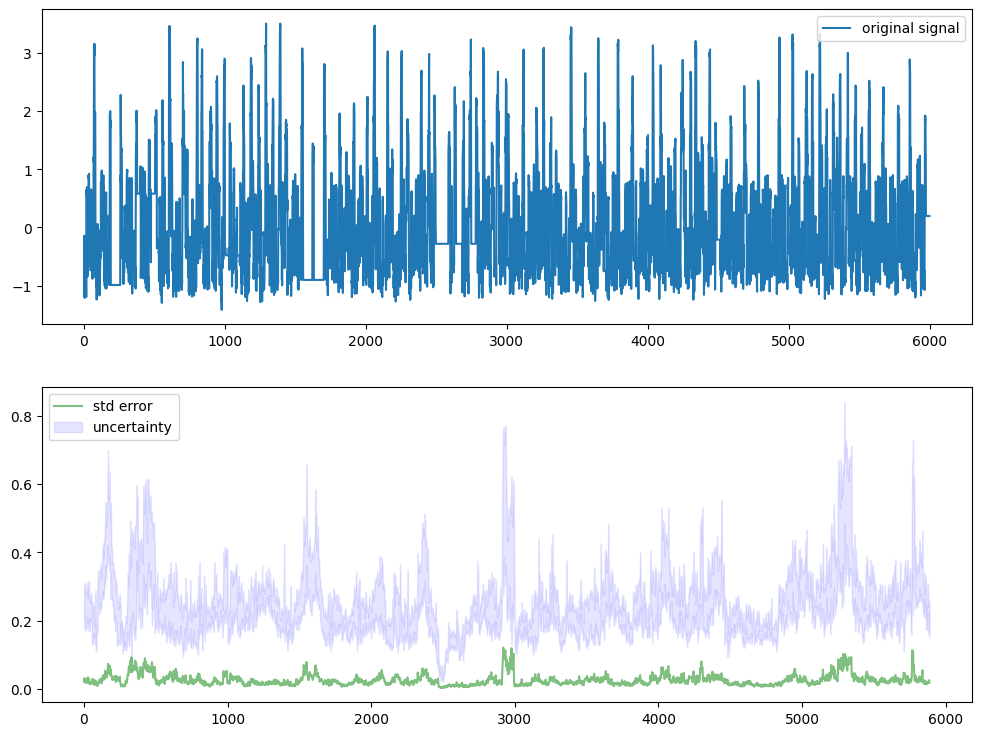

In [30]:
# anomaly detection only vae on test
test_dataset = VAESegLoader(test, config.win_size, "test")

test_dataloader =  DataLoader(
    dataset = test_dataset, 
    batch_size = config.batch_size,
    shuffle=False,
    drop_last=True,
)

train_dataset = VAESegLoader(training, config.win_size, "train")

train_dataloader =  DataLoader(
    dataset = train_dataset, 
    batch_size = config.batch_size,
    shuffle=False,
    drop_last=True,
)

# for visualization
# data_len = len(test_dataloader) * config.batch_size
prefix_len = config.win_size - 1
error = np.zeros((len(test_dataloader) * config.batch_size, M))
error_train = np.zeros((len(train_dataloader) * config.batch_size, M))
# var_of_error = np.zeros((data_len, M))
# var_mult_error = np.zeros((data_len, M))
# var_of_window_power_2 = np.zeros((data_len, M))

bvae_ens.eval()
for i, x in enumerate(test_dataloader):
    x = x.view(config.batch_size, config.in_channel, -1)
    x = x.to(config.device)
    predictions = bvae_ens.predict_stack_values(x) # (10, batch_size, in_channel, win_size)
    
    for m in range(M):
        error[i*config.batch_size: (i+1)*config.batch_size, m] = torch.mean((x - predictions[m])**2, dim=(1,2)).detach().cpu().numpy()
        # var_of_window_power_2[i*config.batch_size: (i+1)*config.batch_size, m] = 2 * torch.sum(torch.exp(log_var[m])**2, dim=(1,2)).detach().numpy()
        # var_of_error[i*config.batch_size: (i+1)*config.batch_size, m] = torch.sum(torch.exp(log_var[m]), dim=(1,2)).detach().numpy()
        # var_mult_error[i*config.batch_size: (i+1)*config.batch_size, m] = torch.mean(torch.exp(log_var[m]) * ((x-predictions[m])**2), dim=(1, 2)).detach().numpy()

for i, x in enumerate(train_dataloader):
    x = x.view(config.batch_size, config.in_channel, -1)
    x = x.to(config.device)
    predictions = bvae_ens.predict_stack_values(x) # (10, batch_size, in_channel, win_size)

    for m in range(M):
        error_train[i*config.batch_size: (i+1)*config.batch_size, m] = torch.mean((x - predictions[m])**2, dim=(1,2)).detach().cpu().numpy()
        


# epis_error = np.concatenate((np.ones(prefix_len)*error_std[0], error_std))

error_train_std = np.std(error_train, axis = 1)

error_mean = np.mean(error, axis=1)
error_std = np.std(error, axis=1)
upper_bound = np.mean(error, axis=1) + 2 * error_std
lower_bound = np.mean(error, axis=1) - 2 * error_std
print(error_std.shape)

# plot the reconstruction error
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))
ax[0].plot(test.flatten(), label='original signal')
ax[0].legend()
# ax[1].plot(np.concatenate((np.ones(prefix_len) * error_std[0], error_std)), label='epis error')
# ax[1].legend()
# for i in range(M):
#     ax[1].plot(error[:, i], color='gray', alpha=0.3)
# ax[1].plot(error_mean, color='r', label='mean error', alpha=0.5)
ax[1].plot(error_std, color='green', label='std error', alpha=0.5)
ax[1].fill_between(np.arange(len(upper_bound)), upper_bound, lower_bound, color='blue', alpha=0.1, label='uncertainty')
ax[1].legend()
# ax[1].axhline(y=threshold, color='r', linestyle='--', label='threshold')
plt.show()


In [ ]:
# 预测值的不确定性（方差）

import utils
from dataloader import VAEReconLoader, VAESegLoader
# anomaly detection only vae on test


test_recons_dataset = VAESegLoader(y_tildes_test, config.win_size, "test")
# test_recons_dataset = VAEReconLoader(training, config.win_size, "train")
# test_recons_dataset = VAEReconLoader(test, config.win_size, "test")

batch_size = 1
test_recons_dataloader =  DataLoader(
    dataset = test_recons_dataset, 
    batch_size = batch_size,
    shuffle=False,
    drop_last=True,
)

# for visualization

recons_test = [[] for _ in range(M)]
bvae_ens.eval()
# log_var_net.eval()
# lstm_module.eval()
for i, x in enumerate(test_recons_dataloader):
    x = x.view(batch_size, config.in_channel, -1)
    # prediction = bvae_ens.predict_mean(x) # (10, batch_size, in_channel, win_size)
    x = x.to(config.device)
    predictions = bvae_ens.predict_stack_values(x) # (10, batch_size, in_channel, win_size)

    for m in range(M):
      recons_test[m].append(predictions[m].detach().cpu().numpy().flatten()[0])
      
recons_test = np.array(recons_test)
print(recons_test.shape)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
for i in range(M):
    axs[0].plot(recons_test[i], color='gray', alpha=0.1)
axs[1].plot(np.std(recons_test, axis=0), color='r', label='std', alpha=0.6)
plt.show()

- 根据 《Decomposition of Uncertainty in Bayesian Deep Learning
for Efficient and Risk-sensitive Learning》 进行俩种类型的不确定性分解
suppose p(y|x, w) = ${N(y|\hat{y}, \sigma^2)}$

In [ ]:
from dataloader import VAEReconLoader
import utils
test_recons_dataset = VAEReconLoader(test, config.win_size, "test")
batch_size = 1
test_dataloader =  DataLoader(
    dataset = test_recons_dataset, 
    batch_size = 1,
    shuffle=False,
    drop_last=True,
)

# test_dataset = VAESegLoader(test, config.win_size, "test")

# test_dataloader =  DataLoader(
#     dataset = test_dataset, 
#     batch_size = config.batch_size,
#     shuffle=False,
#     drop_last=True,
# )


data_len = len(test_dataloader) * config.win_size


# >> method a: var_of_win = np.zeros((data_len, M))
# bvae_ens.eval()
# for i, x in enumerate(test_dataloader):
#     x = x.view(batch_size, config.in_channel, -1)
#     predictions, log_var = bvae_ens.predict(x) # (1, batch_size, in_channel, win_size)
#     for m in range(M):
#         var_of_win[i*config.win_size: (i+1)*config.win_size, m] = torch.exp(log_var[m]).flatten().detach().numpy()

# prediction_dist_var_weight = var_of_win # fix weight, predictive distribution 
# print(prediction_dist_var_weight.shape)
# entropy_of_win_weight = [[] for _ in range(M)] # fix weight, predictive entropy
# for m in range(M):
#     entropy_of_win_weight[m] = (utils.differential_entropy(prediction_dist_var_weight[:, m]))
# entropy_of_win_weight = np.array(entropy_of_win_weight)
# alea = np.mean(entropy_of_win_weight, axis=0)

predictions_stack = [ [] for _ in range(M)]
bvae_ens.eval()
for i, x in enumerate(test_dataloader):
    x = x.view(batch_size, config.in_channel, -1)
    predictions = bvae_ens.predict_stack_values(x) # (10, batch_size, in_channel, win_size)
    for i in range(M):
        predictions_stack[i].extend(predictions[i].detach().numpy().flatten())
predictions_stack = np.array(predictions_stack)


# calculate the total uncertainty (entropy of predictive posterior distribution)
prediction_dist_var = np.zeros(data_len)
prediction_dist_var_sample = np.std(predictions_stack, axis=0)

entropy_of_win = np.zeros(data_len)
for i in range(data_len):
    # prediction_dist_var[i] = var_of_win[i].sum() / (M**2)
    entropy_of_win[i] = utils.differential_entropy(prediction_dist_var_sample[i])



alea = approx_var_heter
print(approx_var_heter.shape)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax[0].plot(test.flatten(), label='original signal')
ax[0].legend()
ax[1].plot(prediction_dist_var_sample, label = 'total')
ax[1].legend()
ax[2].plot(alea, color='red', label = 'alea')
ax[2].legend()
ax[3].plot(entropy_of_win - alea, label = 'epic')
ax[3].legend()
plt.show()    

### Evaluation
1. `FN`/`FP`/`TN`/`TP`下的不确定性表现
2. 需要按照250（建议config.win_size也这样设置）的间隔基于异常分数进行划分

(5983,) (5983,) (5983,)


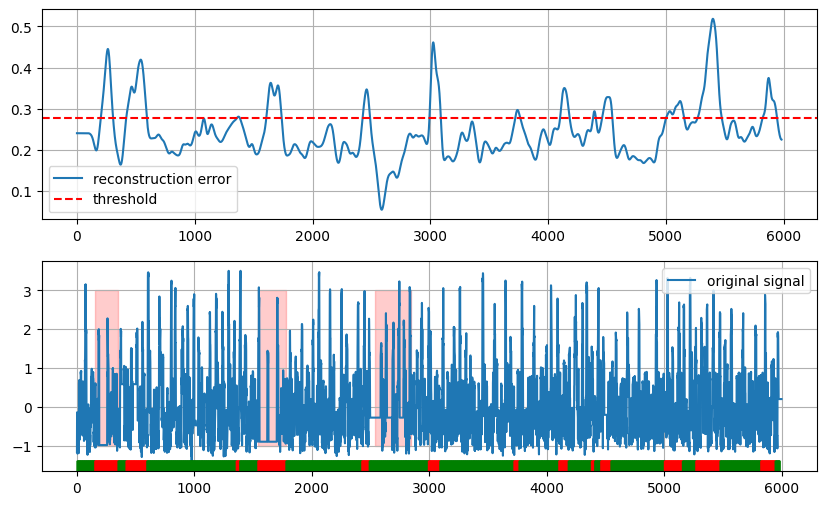

In [31]:
import matplotlib.patches as patches
from scipy.ndimage import gaussian_filter1d
# 1.确定FN/FP/TN/TP，具体做法是按照label的数据范围将数据分为FN+FP和TN+TP两类

anomaly_index = [[150, 350], [1540, 1780], [2535, 2845]] 
# anomaly_index = [[442, 452], [1683, 1693], [3026, 3036], [3334, 3344], [4580, 4590]]
# anomaly_index = [[521, 522], [2980, 2981]]

train_dataset = VAESegLoader(training, config.win_size, "train")
train_dataloader =  DataLoader(
    dataset = train_dataset, 
    batch_size = config.batch_size,
    shuffle=True,
    drop_last=True,
)

data_len = len(train_dataloader) * config.batch_size
train_nll = np.zeros((data_len, M))

# get train nlll -> error score threshold
bvae_ens.eval()
for i, x in enumerate(train_dataloader):
    x = x.view(config.batch_size, config.in_channel, -1)
    x = x.to(config.device)
    predictions = bvae_ens.predict_stack_values(x) # (10, batch_size, in_channel, win_size)
    for m in range(M):
        train_nll[i*config.batch_size: (i+1)*config.batch_size, m] = torch.mean((x - predictions[m])**2, dim=(1,2)).detach().cpu().numpy()

train_nll_mean = np.mean(train_nll, axis=1)

threshold = np.percentile(train_nll_mean, 95)
# threshold = np.percentile(error_mean, 95)

filter_win = 30
# error_smoothed = np.convolve(error_mean, np.ones(filter_win)/filter_win, mode='same')
error_smoothed = gaussian_filter1d(error_mean, sigma=15)
prefix = np.ones(config.win_size - 1) * error_smoothed[0]
error_smoothed = np.concatenate((prefix, error_smoothed))

# construct predict label and adjust
predict_label = np.zeros(error_smoothed.shape)
predict_label[error_smoothed > threshold] = 1
gd_label = np.zeros(error_smoothed.shape)
for index in anomaly_index:
    gd_label[index[0]: index[1]] = 1


pred, gd = utils.adjuct_pred(predict_label, gd_label)
pred, gd = utils.adjuct_gt(pred, gd)
pred[-1] = 0
gd[-1] = 0
anomaly_index = utils.get_anomaly_segment(gd)
for index in anomaly_index:
    gd_label[index[0]: index[1]] = 1

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
ax[0].plot(error_smoothed, label='reconstruction error')
ax[0].axhline(y=threshold, color='r', linestyle='--', label='threshold')
ax[0].legend()
ax[0].grid()
ax[1].plot(test.flatten(), label='original signal')

for index in anomaly_index:
    ax[1].fill_between(np.arange(index[0], index[1]), -1, 3, color='red', alpha=0.2)
ax[1].grid()
ax[1].legend()

print(predict_label.shape, gd_label.shape, error_smoothed.shape)
# adjust the predict label



for idx in range(len(predict_label)):
    if pred[idx] == 1:
        ax[1].axvline(x=idx, color='r', ymin=0., ymax=0.05, linewidth=1)
    else:
        ax[1].axvline(x=idx, color='g', ymin=0., ymax=0.05, linewidth=1)


- 全方差公式对预测分布进行不确定性分解
1. 确定高epistemic的阈值
2. 获得aleatoric

In [21]:
from dataloader import VAEReconLoader
import utils
train_recons_dataset = VAEReconLoader(training, config.win_size, "train")
batch_size = 1
train_recons_dataloader = DataLoader(
    dataset = train_recons_dataset, 
    batch_size = 1,
    shuffle=False,
    drop_last=True,
)


data_len = len(train_recons_dataloader) * config.win_size
mean_of_win_train = np.zeros((data_len, M))

bvae_ens.eval()
for i, x in enumerate(train_recons_dataloader):
    x = x.view(batch_size, config.in_channel, -1)
    x = x.to(config.device)
    predictions = bvae_ens.predict_stack_values(x) # (1, batch_size, in_channel, win_size)
    for m in range(M):
        mean_of_win_train[i*config.win_size: (i+1)*config.win_size, m] = predictions[m].flatten().detach().cpu().numpy()

# alea = np.mean(var_of_win, axis=1)

train_epic = np.std(mean_of_win_train, axis=1)
epis_train_threshold_predict = np.percentile(train_epic, 85)
filter_win = 20
epic_train_smoot = np.convolve(train_epic, np.ones(filter_win)/filter_win, mode='same')
print(epic_train_smoot.shape, epic_train_smoot.mean())

# 64 0.1861294200076695
# 128 0.17173834434580568
# deep ensemble 0.1709
# bae ensemble weight_decay(* 1e-2) 0.1707
# bae ensemble weight_decay(* 1e2) 0.195 
# bae ensemble modified 0.221
# bae ensemble not modified 0.17
# bae ensemble data aug/not modified 0.153
# bae ensemble data aug/modified 0.221


(11968,) 0.05304276605704716


(3968,) (3968, 30)
(3968,) (3968,) 0.15409648578294222


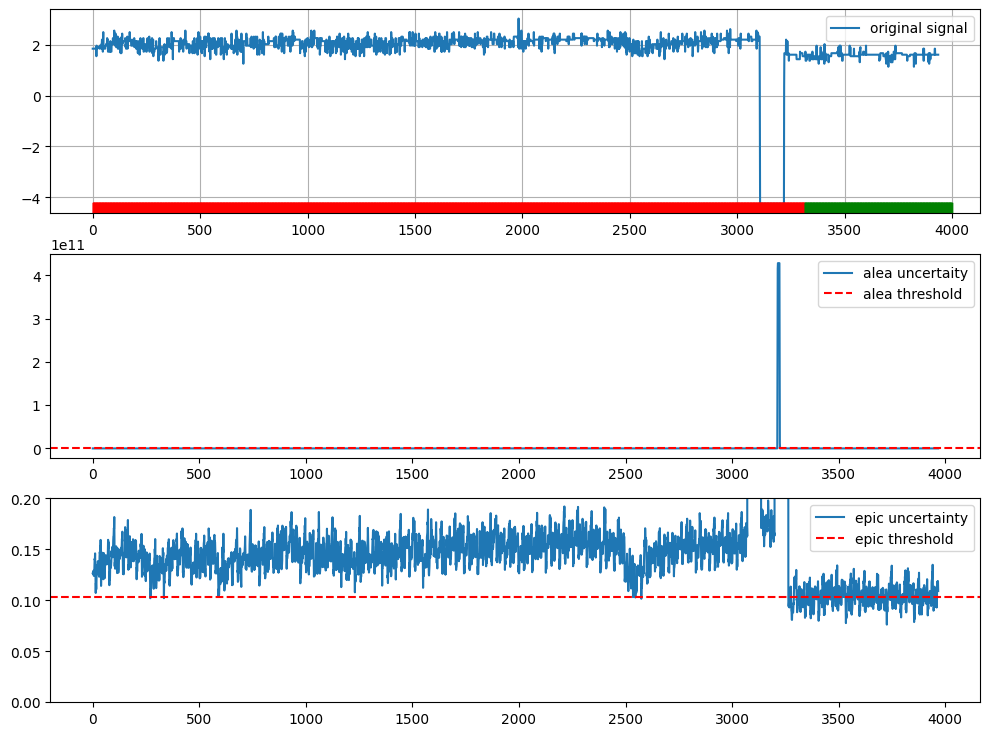

In [22]:
from dataloader import VAEReconLoader
import utils

test_recons_dataset = VAEReconLoader(test, config.win_size, "test")
batch_size = 1
test_dataloader =  DataLoader(
    dataset = test_recons_dataset, 
    batch_size = 1,
    shuffle=False,
    drop_last=True,
)


data_len = len(test_dataloader) * config.win_size
var_of_win = np.zeros((data_len, M))
mean_of_win = np.zeros((data_len, M))

bvae_ens.eval()
for i, x in enumerate(test_dataloader):
    x = x.view(batch_size, config.in_channel, -1)
    x = x.to(config.device)
    predictions = bvae_ens.predict_stack_values(x) # (1, batch_size, in_channel, win_size)
    for m in range(M):
        # var_of_window_power_2[i*config.batch_size: (i+1)*config.batch_size, m] = 2 * torch.sum(torch.exp(log_var[m])**2, dim=(1,2)).detach().numpy()
        # var_of_win[i*config.win_size: (i+1)*config.win_size, m] = torch.exp(log_var[m]).flatten().detach().numpy()
        mean_of_win[i*config.win_size: (i+1)*config.win_size, m] = predictions[m].flatten().detach().cpu().numpy()

# alea = np.mean(var_of_win, axis=1)

alea = approx_var_heter

epis = np.std(mean_of_win, axis=1)
print(recstructed_signal.shape, mean_of_win.shape)

filter_win = 20
epic_smoot = np.convolve(epis, np.ones(filter_win)/filter_win, mode='same')
alea_smoot = np.convolve(alea, np.ones(filter_win)/filter_win, mode='same')

anomaly_score_smoothed = np.convolve(error_mean, np.ones(filter_win)/filter_win, mode='same')
prefix = np.ones(config.win_size - 1) * anomaly_score_smoothed[0]
anomaly_score_smoothed = np.concatenate((prefix, anomaly_score_smoothed))


fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 9))
ax[0].plot(test.flatten()[: len(error_mean)], label='original signal')
# for index in anomaly_index:
#     ax[0].fill_between(np.arange(index[0], index[1]), -1, 3, color='red', alpha=0.2)
ax[0].grid()
ax[0].legend()
for idx in range(len(predict_label)):
    if pred[idx] == 1:
        ax[0].axvline(x=idx, color='r', ymin=0., ymax=0.05, linewidth=1)
    else:
        ax[0].axvline(x=idx, color='g', ymin=0., ymax=0.05, linewidth=1)

ax[1].plot(alea, label = 'alea uncertaity')
ax[1].axhline(y = np.percentile(alea, 90), color='r', linestyle='--', label='alea threshold')
# ax[1].set_ylim(0, 0.4)
ax[1].legend()
ax[2].plot(epis, label = 'epic uncertainty')
# ax[2].plot(epic_train_smoot, label = "train epic")
epis_threshold = np.percentile(error_train_std, 100)
ax[2].axhline(y = epis_train_threshold_predict, color='r', linestyle='--', label='epic threshold')
ax[2].set_ylim(0, 0.2)

ax[2].legend()

print(epis.shape, alea.shape, epis.mean())
plt.show()    

- 全方差分解公式+非中心卡方分布来进行认知不确定性和任意不确定性的分解

In [ ]:
print("error", error.shape)
len_err = error.shape[0]
score_mu = [ [] for _ in range(M) ]
score_var = [ [] for _ in range(M) ]
for i in range(M):
    score_mu[i] = error[:, i] + var_of_error[:, i]
    score_var[i] = 2 * var_of_window_power_2[:, i] + 4 * var_mult_error[:, i]
score_mu = np.array(score_mu)
score_var = np.array(score_var)
epis = np.std(score_mu, axis=0)
epis = np.concatenate((np.zeros(config.win_size-1), epis))
alea = np.mean(score_var, axis=0)
alea = np.concatenate((np.ones(config.win_size-1)*alea[0], alea))
# alea = np.mean(score_var, axis=0)
print(epis.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 9))
ax[0].plot(test.flatten(), label='original signal')
ax[0].legend()

ax[1].plot(epis, label = 'epis')
ax[1].legend()
ax[2].plot(alea, label = 'alea')
plt.show()    

- 全方差公式+卡方分布

In [ ]:
print("error", error.shape)
len_err = error.shape[0]
n_experiments = M
score_mu = [ [] for _ in range(n_experiments) ]
score_var = [ [] for _ in range(n_experiments) ]
for i in range(n_experiments):
    score_mu[i] = var_of_error[:, i]
    score_var[i] = var_of_window_power_2[:, i]
score_mu = np.array(score_mu)
score_var = np.array(score_var)
epis = np.std(score_mu, axis=0)
epis = np.concatenate((np.zeros(config.win_size-1), epis))
alea = np.mean(score_var, axis=0)
alea = np.concatenate((np.zeros(config.win_size-1), alea))
# alea = np.mean(score_var, axis=0)
print(epis.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 9))
ax[0].plot(test.flatten(), label='original signal')
ax[0].legend()

ax[1].plot(epis, label = 'epis')
ax[1].legend()
ax[2].plot(alea, label = 'alea')
plt.show()    

如果仍然把异常分数的分布视为多维高斯分布, 那么假设 alea is a constant but it should not !!!! 。其实异常分数的方差就可以视为认知不确定性，（不确定性）方差越大，异常分数越不可信

In [ ]:
# 如果仍然把异常分数的分布视为多维高斯分布， 即
print("error", error.shape)

epis = np.std(error, axis=1)
epis = np.concatenate((np.zeros(config.win_size-1), epis))
# here, alea is a constant but it should not !!!! 
# alea = np.mean(score_var, axis=0)
print(epis.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
ax[0].plot(test.flatten(), label='original signal')
ax[0].legend()

ax[1].plot(epis, label = 'epis')

plt.show()    

In [ ]:
# 归一化来得到异常分数的概率
p_anomaly = []
for i in range(M):
    p_anomaly_i = (error[:, i] - np.min(error[:, i])) / (np.max(error[:, i]) - np.min(error[:, i]))
    p_anomaly.append(p_anomaly_i)
p_anomaly = np.array(p_anomaly)
p_anomaly_mean = np.mean(p_anomaly, axis=0)
p_anomaly_std = np.std(p_anomaly, axis=0)
p_anomaly_upper = p_anomaly_mean + 2 * np.std(p_anomaly, axis=0)
p_anomaly_lower = p_anomaly_mean - 2 * np.std(p_anomaly, axis=0)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
ax[0].plot(test, label='original signal')
ax[0].legend()
# ax[1].plot(p_anomaly_mean, label='p_anomaly')
# ax[1].fill_between(np.arange(len(p_anomaly_mean)), p_anomaly_upper, p_anomaly_lower, color='gray', alpha=0.5, label='p_anomaly uncertainty')
for i in range(M):
    ax[1].plot(p_anomaly[i, :], color='gray', alpha=0.5)
ax[1].plot(p_anomaly_std, label='p_anomaly')
ax[1].legend()


不进行修正的ecdf

In [ ]:
from utils import ecdf as ecdf
# calculate the epistemic uncertainty

# 1. first convert nll to distribution based `ecdf`
train_dataloader =  DataLoader(
    dataset = train_dataset, 
    batch_size = config.batch_size,
    shuffle=True,
    drop_last=True,
)

data_len = len(train_dataloader) * config.batch_size
train_nll = np.zeros((data_len, 10))

bvae_ens.eval()
for i, x in enumerate(train_dataloader):
    x = x.view(config.batch_size, config.in_channel, -1)
    predictions = bvae_ens.predict(x) # (10, batch_size, in_channel, win_size)
    for m in range(10):
        train_nll[i*config.batch_size: (i+1)*config.batch_size, m] = torch.mean((x - predictions[m])**2, dim=(1,2)).detach().numpy()


p_anomaly = []
for i in range(10):
    p_anomaly_i = ecdf(train_nll[:, i], error[:, i])
    p_anomaly.append(p_anomaly_i)
p_anomaly = np.array(p_anomaly)
print(p_anomaly.shape)
# p_anomaly_i = ecdf(train_nll[:, i], error[:, i])
# p_anomaly_i = np.concatenate((prefix, p_anomaly_i))
# fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 6))
# ax[0].plot(test, label='original signal')
# ax[0].legend()
# ax[1].plot(p_anomaly_i, label='epistemic uncertainty')
# ax[1].legend()
# ax[2].plot(train_nll[:, i])
# ax[3].plot(np.concatenate((prefix, error[:, i])))

# plot the reconstruction error
# import matplotlib.pyplot as plt

    


进行修正的ecdf

In [ ]:
from utils import ecdf as ecdf
# calculate the epistemic uncertainty

# 1. first convert nll to distribution based `ecdf`
train_dataloader =  DataLoader(
    dataset = train_dataset, 
    batch_size = config.batch_size,
    shuffle=True,
    drop_last=True,
)

data_len = len(train_dataloader) * config.batch_size
train_nll = np.zeros((data_len, 10))

bvae_ens.eval()
for i, x in enumerate(train_dataloader):
    x = x.view(config.batch_size, config.in_channel, -1)
    predictions = bvae_ens.predict(x) # (10, batch_size, in_channel, win_size)
    for m in range(M):
        train_nll[i*config.batch_size: (i+1)*config.batch_size, m] = torch.mean((x - predictions[m])**2, dim=(1,2)).detach().numpy()

sigma2 = 0.25 # np.std(test.flatten())
sample_size = 20
p_anomaly = []
for i in range(M):
    samples = np.random.multivariate_normal(error[:, i], np.eye(len(error[:, i])) * sigma2, sample_size)

    # train_nll_mean = np.mean(train_nll[:, i], axis=0)
    # ecdf_train = ecdf(train_nll[:, i], train_nll_mean)
    p_anomaly_i = []
    for sample in samples:
        p_anomaly_i_sample = ecdf(train_nll[:, i], sample)
        p_anomaly_i.append(p_anomaly_i_sample)
    p_anomaly_i = np.array(p_anomaly_i)
    p_anomaly_i = np.mean(p_anomaly_i, axis=0)
    # p_anomaly_i = np.maximum(0, (p_anomaly_i - ecdf_train) / (1 - ecdf_train)) # scale 
    p_anomaly.append(p_anomaly_i)
p_anomaly = np.array(p_anomaly)
p_anomaly_mean = np.mean(p_anomaly, axis=0)
p_anomaly_mean = np.concatenate((np.ones(config.win_size - 1) * p_anomaly_mean[0], p_anomaly_mean))
p_anomaly_std = np.std(p_anomaly, axis=0)
p_anomaly_std = np.concatenate((np.ones(config.win_size - 1) * p_anomaly_std[0], p_anomaly_std))
p_anomaly_upper = p_anomaly_mean + 2 * p_anomaly_std
p_anomaly_lower = p_anomaly_mean - 2 * p_anomaly_std
print(p_anomaly_mean.shape)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
ax[0].plot(test, label='original signal')
ax[0].legend()
# ax[1].fill_between(np.arange(len(p_anomaly_mean)), p_anomaly_upper, p_anomaly_lower, color='gray', alpha=0.5, label='p_anomaly uncertainty')
ax[1].plot(p_anomaly_mean, label='p_anomaly')
ax[1].legend()
# plot the reconstruction error
# import matplotlib.pyplot as plt

    


这个我是按照原论文复现的，和自己实现的差不多----有问题

In [ ]:

import utils
train_dataloader =  DataLoader(
    dataset = train_dataset, 
    batch_size = config.batch_size,
    shuffle=True,
    drop_last=True,
)

data_len = len(train_dataloader) * config.batch_size
train_nll = np.zeros((data_len, M))
bvae_ens.eval()
for i, x in enumerate(train_dataloader):
    x = x.view(config.batch_size, config.in_channel, -1)
    predictions = bvae_ens.predict(x) # (10, batch_size, in_channel, win_size)
    for m in range(M):
        train_nll[i*config.batch_size: (i+1)*config.batch_size, m] = torch.mean((x - predictions[m])**2, dim=(1,2)).detach().numpy()

bae_proba_model = utils.BAE_Outlier_proba()
bae_proba_model.fit(train_nll)
p_anomaly = bae_proba_model.predict(error)
print(p_anomaly.shape)

p_anomaly_mean = np.mean(p_anomaly, axis=0)
p_anomaly_upper = p_anomaly_mean + 2 * np.std(p_anomaly, axis=0)
p_anomaly_lower = p_anomaly_mean - 2 * np.std(p_anomaly, axis=0)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
ax[0].plot(test, label='original signal')
ax[0].legend()
# ax[1].fill_between(np.arange(len(p_anomaly_mean)), p_anomaly_upper, p_anomaly_lower, color='gray', alpha=0.5, label='p_anomaly uncertainty')
ax[1].plot(p_anomaly_mean, label='p_anomaly')
ax[1].plot(error_mean, label='error_mean')
ax[1].legend()



- 根据ecdf进行不确定性分解

In [ ]:
# 2. calculate the epistemic uncertainty
print(p_anomaly.shape)

epistemic_uncertainty = np.std(p_anomaly, axis=0)
epistemic_uncertainty = np.concatenate((np.ones(config.win_size - 1) * epistemic_uncertainty[0], epistemic_uncertainty))

filter_win = 20
epistemic_uncertainty_smoothed = np.convolve(epistemic_uncertainty, np.ones(filter_win)/filter_win, mode='same')
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
ax[0].plot(test.flatten(), label='original signal')
ax[0].legend()
ax[1].plot(epistemic_uncertainty_smoothed, label='epistemic uncertainty')
# ax[1].plot(epistemic_uncertainty, label='epistemic uncertainty')
# ax[1].fill_between(np.arange(len(epistemic_upper_bound)), epistemic_upper_bound, epistemic_lower_bound, color='gray', alpha=0.5, label='epistemic uncertainty')
ax[1].legend()



In [ ]:
# 2. calculate the aleatoric uncertainty
print(p_anomaly.shape)
aleatoric_uncertainty = []
for i in range(M):
    p_anomaly_i = p_anomaly[i] # Bernoulli distribution
    p_anomaly_i_var = p_anomaly_i * (1 - p_anomaly_i)
    aleatoric_uncertainty.append(p_anomaly_i_var)
aleatoric_uncertainty = np.array(aleatoric_uncertainty)
# epistemic_uncertainty = np.std(p_anomaly, axis=0) * 10 / 9
aleatoric_uncertainty = np.mean(aleatoric_uncertainty, axis=0)
aleatoric_uncertainty = np.concatenate((np.ones(config.win_size - 1) * aleatoric_uncertainty[0], aleatoric_uncertainty))

aleatoric_uncertainty_smoothed = np.convolve(aleatoric_uncertainty, np.ones(filter_win)/filter_win, mode='same')
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
ax[0].plot(test.flatten(), label='original signal')
ax[0].legend()
ax[1].plot(aleatoric_uncertainty_smoothed, label='aleatoric uncertainty')
# ax[1].fill_between(np.arange(len(epistemic_upper_bound)), epistemic_upper_bound, epistemic_lower_bound, color='gray', alpha=0.5, label='epistemic uncertainty')
ax[1].legend()


In [ ]:
# 通过样本方差建立不确定性(根据全方差定律可以认为是epistemic uncertainty + aleatoric uncertainty)
test_dataset = VAESegLoader(test, config.win_size, "test")
test_dataloader =  DataLoader(
    dataset = test_dataset, 
    batch_size = config.batch_size,
    shuffle=False,
    drop_last=True,
)

recons_error = np.zeros((M, len(test_dataloader) * config.batch_size))

bvae_ens.eval()
for i, x in enumerate(test_dataloader):
    x = x.view(config.batch_size, config.in_channel, -1)
    predictions = bvae_ens.predict(x) # (10, batch_size, in_channel, win_size)
    error_batch_i = []
    for m in range(M):
        error_m = torch.mean((x - predictions[m])**2, dim=(1,2)).detach().numpy()
        error_batch_i.append(error_m)
    error_batch_i = np.array(error_batch_i)
    recons_error[:, i * config.batch_size: (i+1) * config.batch_size] = error_batch_i

print(recons_error.shape)

# 计算样本方差
recons_error_std = np.std(recons_error, axis=0) * 10 / 9

prefix = np.ones(config.win_size - 1) * recons_error_std[0]
recons_error_std = np.concatenate((prefix, recons_error_std))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
ax[0].plot(test.flatten(), label='original signal')
ax[0].legend()
ax[1].plot(recons_error_std, label='total uncertainty')
ax[1].legend()
plt.show()
    



In [71]:
print(error_mean.shape, gd_label.shape)
prefix = np.ones(config.win_size-1) * error_mean[0]
error_of_expand = np.concatenate((prefix, error_mean))
print(error_of_expand.shape)
split_size = 10
calibration_data = []
for i in range(0, len(error_of_expand), split_size):
    pred = error_mean[i: i + split_size]
    obser = gd_label[i: i + split_size]
    pred_anomaly_num = len(np.where(pred > threshold)[0])
    obser_anomaly_num = len(np.where(obser > 0)[0]) # [[150, 350], [1550, 1750], [2550, 2850]] 
    calibration_data.append((pred_anomaly_num, obser_anomaly_num))
print(calibration_data.shape)

(2816,) (2943,)
(2943,)


AttributeError: 'list' object has no attribute 'shape'

- 计算校准图(epis + alea)

In [ ]:

# expand error to the same shape as the original signal
error_of_expand = []
for i in range(M):
    prefix = np.ones(config.win_size-1) * error[0, i]
    error_of_expand.append(np.concatenate((prefix, error[:, i])))
error_of_expand = np.array(error_of_expand)

filter_win = 30
for m in range(M):
    error_of_expand[m] = np.convolve(error_of_expand[m], np.ones(filter_win)/filter_win, mode='same')

pred_prob = []
for i in range(error_of_expand.shape[1]):
    pred_i = 0
    for m in range(M):
        if error_of_expand[m, i] > threshold:
            pred_i += 1
    pred_i = pred_i / M
    pred_prob.append(pred_i)
pred_prob = np.array(pred_prob)

print(error_of_expand.shape, gd_label.shape, pred_prob.shape)
split_probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# split_probs = np.linspace(0, 0.5, 10)
print(split_probs)
calibration_data = []

for prob in split_probs:
    obser_num = 0
    if prob == split_probs[0]:
        idx_s = np.where((pred_prob <= prob) & (pred_prob >= 0))[0]
    else:
        idx_s = np.where((pred_prob <= prob) & (pred_prob > round(prob - 0.1, 2)))[0]
    for i in idx_s:
        if gd_label[i] == 1:
            obser_num += 1
    calibration_data.append((prob, obser_num / len(idx_s)))

print(calibration_data)



(30, 3199) (3199,) (3199,)
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[(0.1, 0.0), (0.2, 0.0), (0.3, 0.0), (0.4, 0.22727272727272727), (0.5, 0.5789473684210527), (0.6, 0.5555555555555556), (0.7, 0.8703703703703703), (0.8, 0.8214285714285714), (0.9, 0.43333333333333335), (1.0, 0.44692737430167595)]


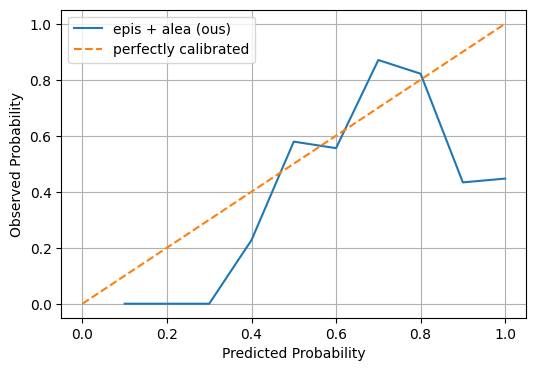

In [17]:
# plot calibration
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
calibration_data_rnll = np.array(calibration_data)
ax.plot(calibration_data_rnll[:, 0], calibration_data_rnll[:, 1], label='epis + alea (ous)')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('Observed Probability')
ax.grid()
# ax.plot(calibration_data2[:, 0], calibration_data2[:, 1], label='epis')
ax.plot([0, 1], [0, 1], linestyle='--', label='perfectly calibrated')
ax.legend()
plt.show()


# data_name = "NAB_ambient_Epis_Alea_Calibration"
# df = pd.DataFrame(calibration_data, columns=['Predicted Probability', 'Observed Probability'])
# df.to_csv(f'./result/{data_name}_calibration.csv', index=False)

In [124]:
calibration_data_epis_alea = calibration_data



In [132]:
calibration_data_epis = calibration_data

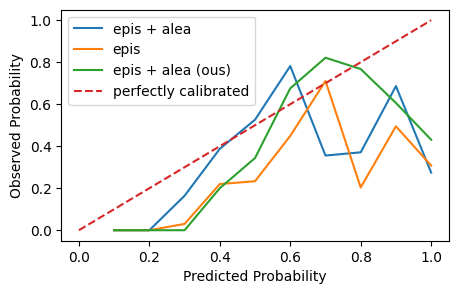

In [191]:
# calibration_data_no_epis = calibration_data
import pandas as pd

df_epis_alea = pd.read_csv(f'./result/NAB_ambient_Epis_Alea_calibration.csv')
df_epis = pd.read_csv(f'./result/NAB_Ambient_Epis_calibration.csv')
calibration_data_epis_alea_obser = df_epis_alea['Observed Probability'].values
calibration_data_epis_alea_pred = df_epis_alea['Predicted Probability'].values
calibration_data_epis_obser = df_epis['Observed Probability'].values
calibration_data_epis_pred = df_epis['Predicted Probability'].values
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
# print(calibration_data_epis_alea.shape, calibration_data_epis.shape)
ax.plot(calibration_data_epis_alea_pred, calibration_data_epis_alea_obser, label='epis + alea')
ax.plot(calibration_data_epis_pred, calibration_data_epis_obser, label='epis')
ax.plot(calibration_data_rnll[:, 0], calibration_data_rnll[:, 1], label='epis + alea (ous)')
ax.plot([0, 1], [0, 1], linestyle='--', label='perfectly calibrated')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('Observed Probability')
ax.legend()
plt.show()


(10, 2) (10, 2)


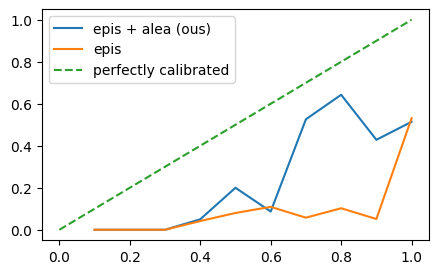

In [ ]:
# plot calibration

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
print(calibration_data_epis_alea.shape, calibration_data_epis.shape)
ax.plot(calibration_data_epis_alea[:, 0], calibration_data_epis_alea[:, 1], label='epis + alea (ous)')
ax.plot(calibration_data_epis[:, 0], calibration_data_epis[:, 1], label='epis')
ax.plot([0, 1], [0, 1], linestyle='--', label='perfectly calibrated')
ax.legend()
plt.show()


# utils.logging("calibration-log", "SMAP-P1", calibration_data_epis, calibration_data_epis_alea)

In [35]:
data_name = "NAB_Ambient_Epis"
df = pd.DataFrame(calibration_data_epis, columns=['Predicted Probability', 'Observed Probability'])
df.to_csv(f'./result/{data_name}_calibration.csv', index=False)